In [1]:
datTree = Tree(JetHT_Data_UL)
datTree.initialize_t6_X()

X = datTree.t6_X

In [2]:
cut_6jNN = 0

# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [3]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

In [4]:
dat_6sums = ak.sum(datTree.t6_jet_btag, axis=1)/6

In [5]:
#### DATA ####
dat_6jNN_mask = datTree.b_6j_score > cut_6jNN # pass 6jNN mask

# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)
dat_Dm      = datTree.t6_higgs_m - 125
dat_Dm_pos  = ak.all(datTree.t6_higgs_m - 125 > 0, axis=1)
dat_Dm_neg  = ak.all(datTree.t6_higgs_m - 125 < 0, axis=1)

# triple mass veto
dat_SR = ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR
dat_VR = ak.all(dat_Dm_cand > SR_edge, axis=1) & ak.all(dat_Dm_cand <= VR_edge, axis=1) # VR
dat_CR = ak.all(dat_Dm_cand > VR_edge, axis=1) # CR

hi_m = ak.all(dat_Dm < -SR_edge, axis=1)
lo_m = ak.all(dat_Dm > -VR_edge, axis=1)
dat_SRlo = ak.all(dat_Dm >= -SR_edge, axis=1) # SR
# dat_VRlo = ak.all(dat_Dm[dat_Dm_neg] < -SR_edge, axis=1) & ak.all(dat_Dm[dat_Dm_neg] >= -VR_edge, axis=1) # VR
dat_VRlo = hi_m & lo_m # VR
dat_CRlo = ak.all(dat_Dm < -VR_edge, axis=1) # CR

hi_m = ak.all(dat_Dm <= VR_edge, axis=1)
lo_m = ak.all(dat_Dm > SR_edge, axis=1)
dat_SRhi = ak.all(dat_Dm <= SR_edge, axis=1) # SR
dat_VRhi = hi_m & lo_m # VR
dat_CRhi = ak.all(dat_Dm > VR_edge, axis=1) # CR

In [6]:
dat_CR_lo = dat_Dm_neg & dat_CRlo
dat_CR_hi = dat_Dm_pos & dat_CRhi

dat_VR_lo = dat_Dm_neg & dat_VRlo
dat_VR_hi = dat_Dm_pos & dat_VRhi

In [7]:
nbins = 60
mBins = np.linspace(0,2000,nbins)

In [8]:
score_cut = 0.66

#### DATA ####
# score veto
dat_ls_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 < score_cut # ls
dat_hs_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 >= score_cut # hs

dat_CR_lo_ls = dat_ls_mask & dat_CR_lo
dat_CR_hi_ls = dat_ls_mask & dat_CR_hi
dat_CR_lo_hs = dat_hs_mask & dat_CR_lo
dat_CR_hi_hs = dat_hs_mask & dat_CR_hi

dat_VR_lo_ls = dat_ls_mask & dat_VR_lo
dat_VR_hi_ls = dat_ls_mask & dat_VR_hi
dat_VR_lo_hs = dat_hs_mask & dat_VR_lo
dat_VR_hi_hs = dat_hs_mask & dat_VR_hi

# combination
dat_CRls_mask = dat_6jNN_mask & dat_CR & dat_ls_mask
dat_CRhs_mask = dat_6jNN_mask & dat_CR & dat_hs_mask
dat_VRls_mask = dat_6jNN_mask & dat_VR & dat_ls_mask
dat_VRhs_mask = dat_6jNN_mask & dat_VR & dat_hs_mask
dat_SRls_mask = dat_6jNN_mask & dat_SR & dat_ls_mask

In [9]:
dat_Dm_neg & dat_CRls_mask

<Array [False, False, False, ... False, False] type='434815 * bool'>

In [10]:
CRlslo = (dat_Dm_neg & dat_CRls_mask).to_numpy()
CRlshi = (dat_Dm_pos & dat_CRls_mask).to_numpy()
CRhslo = (dat_Dm_neg & dat_CRhs_mask).to_numpy()
CRhshi = (dat_Dm_pos & dat_CRhs_mask).to_numpy()

VRlslo = (dat_Dm_neg & dat_VRls_mask).to_numpy()
VRlshi = (dat_Dm_pos & dat_VRls_mask).to_numpy()
VRhslo = (dat_Dm_neg & dat_VRhs_mask).to_numpy()
VRhshi = (dat_Dm_pos & dat_VRhs_mask).to_numpy()

In [11]:
np.array_equal(VRhslo, VRhshi)

False

In [12]:
print(len(dat_CRls_mask))
print(ak.sum(dat_CRls_mask))
print(len(CRlslo))

434815
61733
434815


In [13]:
TF = ak.sum(dat_CRhs_mask)/ak.sum(dat_CRls_mask)
TF

0.13811089692708925

In [14]:
print(ak.sum(dat_CR_lo_ls))
print(ak.sum(dat_CR_hi_ls))
print(ak.sum(dat_CR_lo_hs))
print(ak.sum(dat_CR_hi_hs))

TF_lo = ak.sum(dat_CR_lo_hs)/ak.sum(dat_CR_lo_ls)
TF_hi = ak.sum(dat_CR_hi_hs)/ak.sum(dat_CR_hi_ls)

3645
57478
579
7860


/tmp/ipykernel_11742/1993688739.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


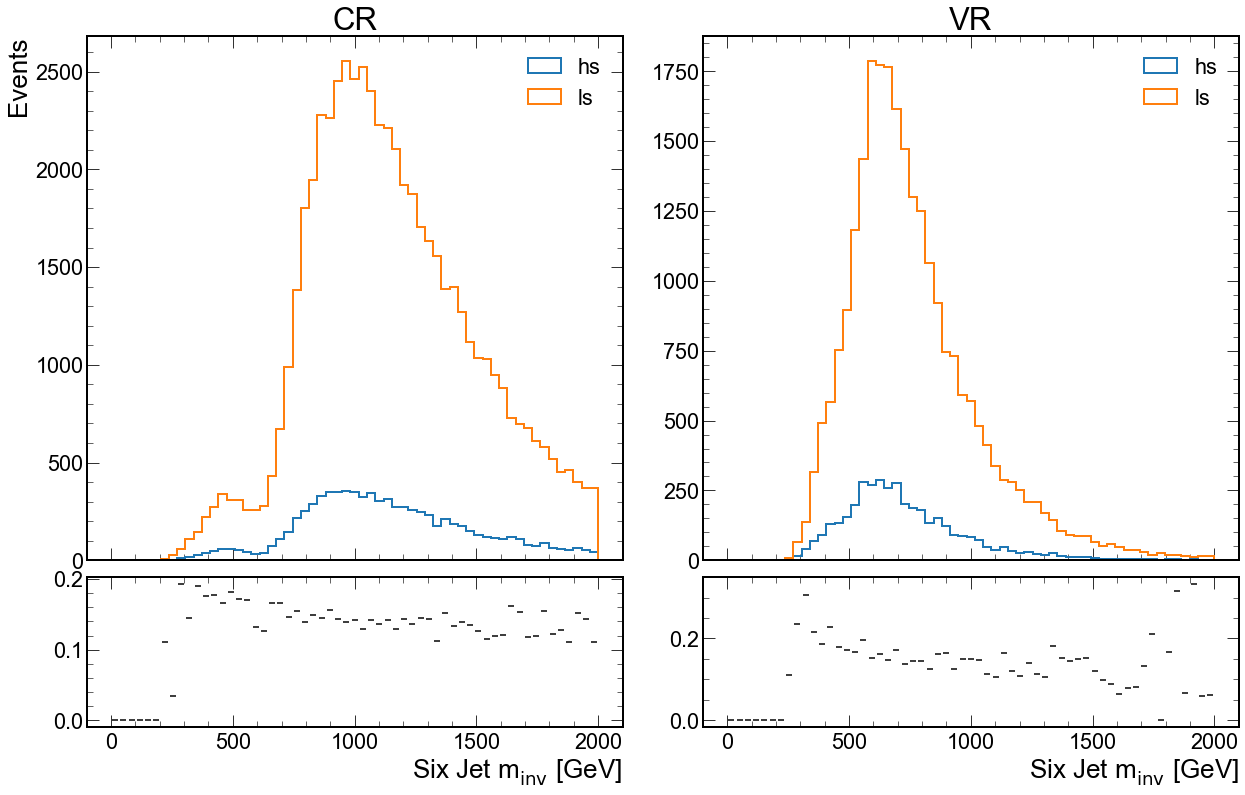

In [74]:
# start with a square Figure
fig = plt.figure(figsize=(20, 12))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(1, 1), height_ratios=(7, 2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.15, hspace=0.05)

ax = fig.add_subplot(gs[0,0])

ax.set_title('CR')

n_CRhs, e = Hist(X.m[dat_CRhs_mask], bins=mBins, ax=ax, label='hs')
n_CRls, e = Hist(X.m[dat_CRls_mask], bins=mBins, ax=ax, label='ls')

ax.set_ylabel('Events')
ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,0], sharex=ax)

ratio = np.where(n_CRls != 0, n_CRhs/n_CRls, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

ax = fig.add_subplot(gs[0,1])

ax.set_title('VR')

n_VRhs, e = Hist(X.m[dat_VRhs_mask], bins=mBins, ax=ax, label='hs')
n_VRls, e = Hist(X.m[dat_VRls_mask], bins=mBins, ax=ax, label='ls')

ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,1], sharex=ax)

ratio = np.where(n_VRls != 0, n_VRhs/n_VRls, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

plt.tight_layout()

/tmp/ipykernel_11742/2064126005.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


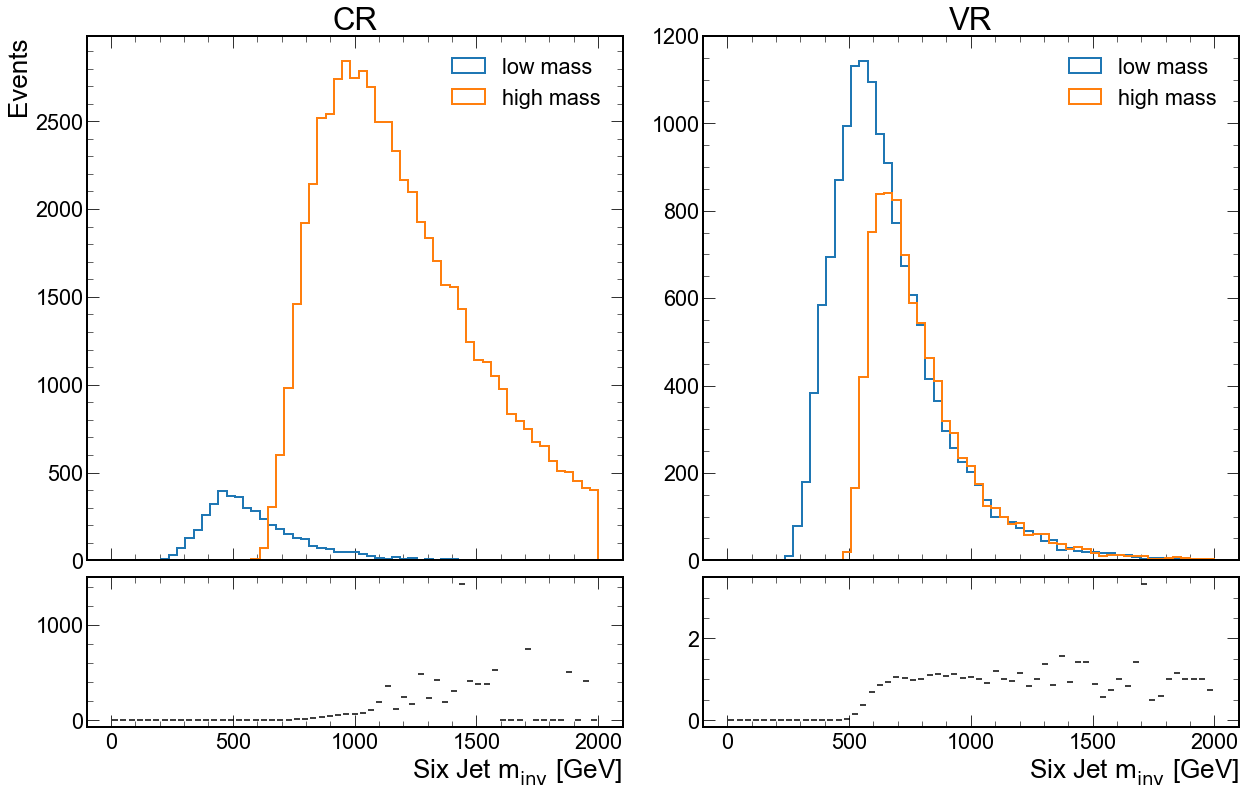

In [88]:
# start with a square Figure
fig = plt.figure(figsize=(20, 12))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(1, 1), height_ratios=(7, 2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.15, hspace=0.05)

ax = fig.add_subplot(gs[0,0])

ax.set_title('CR')

n_CRlo, e = Hist(X.m[dat_CR_lo], bins=mBins, ax=ax, label='low mass')
n_CRhi, e = Hist(X.m[dat_CR_hi], bins=mBins, ax=ax, label='high mass')

ax.set_ylabel('Events')
ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,0], sharex=ax)

ratio = np.where(n_CRlo != 0, n_CRhi/n_CRlo, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

ax = fig.add_subplot(gs[0,1])

ax.set_title('VR')

n_VRlo, e = Hist(X.m[dat_VR_lo], bins=mBins, ax=ax, label='low mass')
n_VRhi, e = Hist(X.m[dat_VR_hi], bins=mBins, ax=ax, label='high mass')

ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,1], sharex=ax)

ratio = np.where(n_VRlo != 0, n_VRhi/n_VRlo, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

plt.tight_layout()

fig.savefig("plots/Data/mass_bands/CR_VR_hi_lo.pdf", bbox_inches='tight')

/tmp/ipykernel_11742/1344215010.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


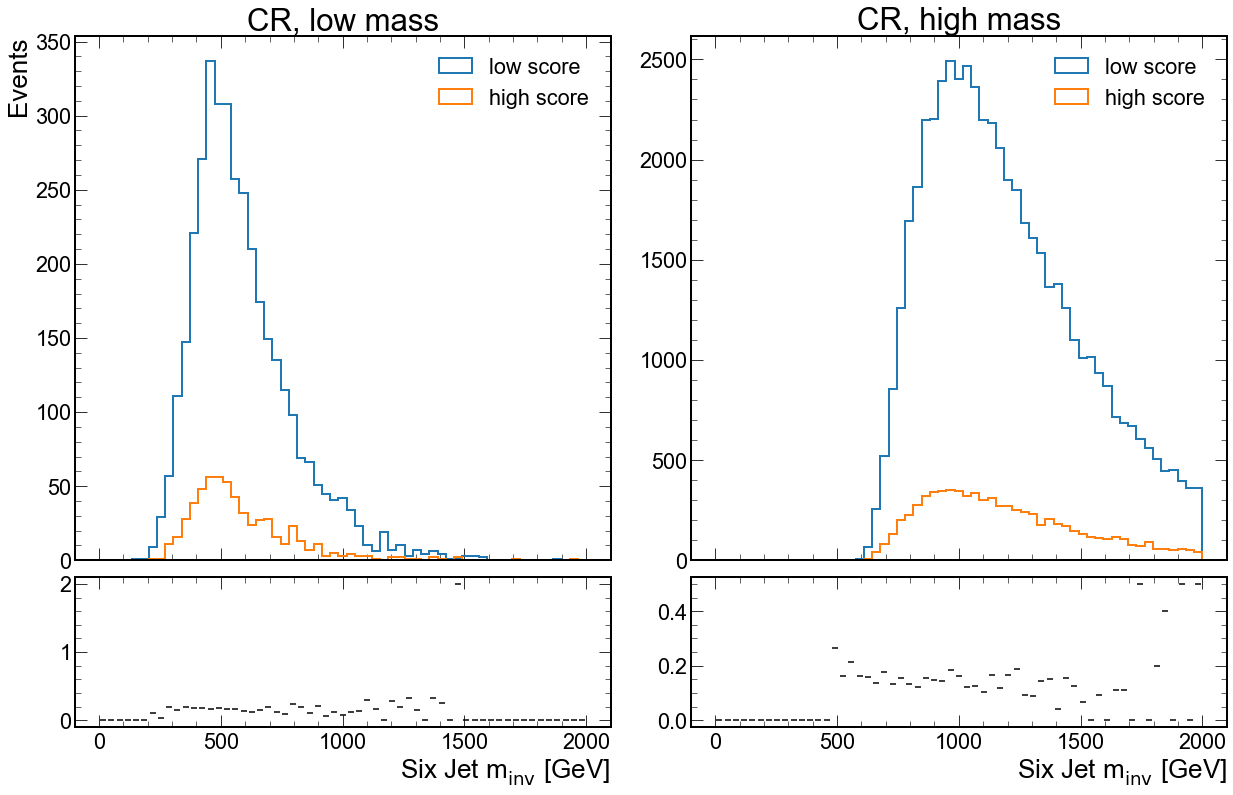

In [89]:
# start with a square Figure
fig = plt.figure(figsize=(20, 12))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(1, 1), height_ratios=(7, 2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.15, hspace=0.05)

ax = fig.add_subplot(gs[0,0])

ax.set_title('CR, low mass')

n_CRls, e = Hist(X.m[CRlslo], bins=mBins, ax=ax, label='low score')
n_CRhs, e = Hist(X.m[CRhslo], bins=mBins, ax=ax, label='high score')

ax.set_ylabel('Events')
ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,0], sharex=ax)

ratio = np.where(n_CRls != 0, n_CRhs/n_CRls, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

ax = fig.add_subplot(gs[0,1])

ax.set_title('CR, high mass')

n_CRls, e = Hist(X.m[CRlshi], bins=mBins, ax=ax, label='low score')
n_CRhs, e = Hist(X.m[CRhshi], bins=mBins, ax=ax, label='high score')

ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,1], sharex=ax)

ratio = np.where(n_VRls != 0, n_VRhs/n_VRls, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

plt.tight_layout()

fig.savefig("plots/Data/mass_bands/CR_hi_lo_hs_ls.pdf", bbox_inches='tight')

/tmp/ipykernel_11742/2358234613.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


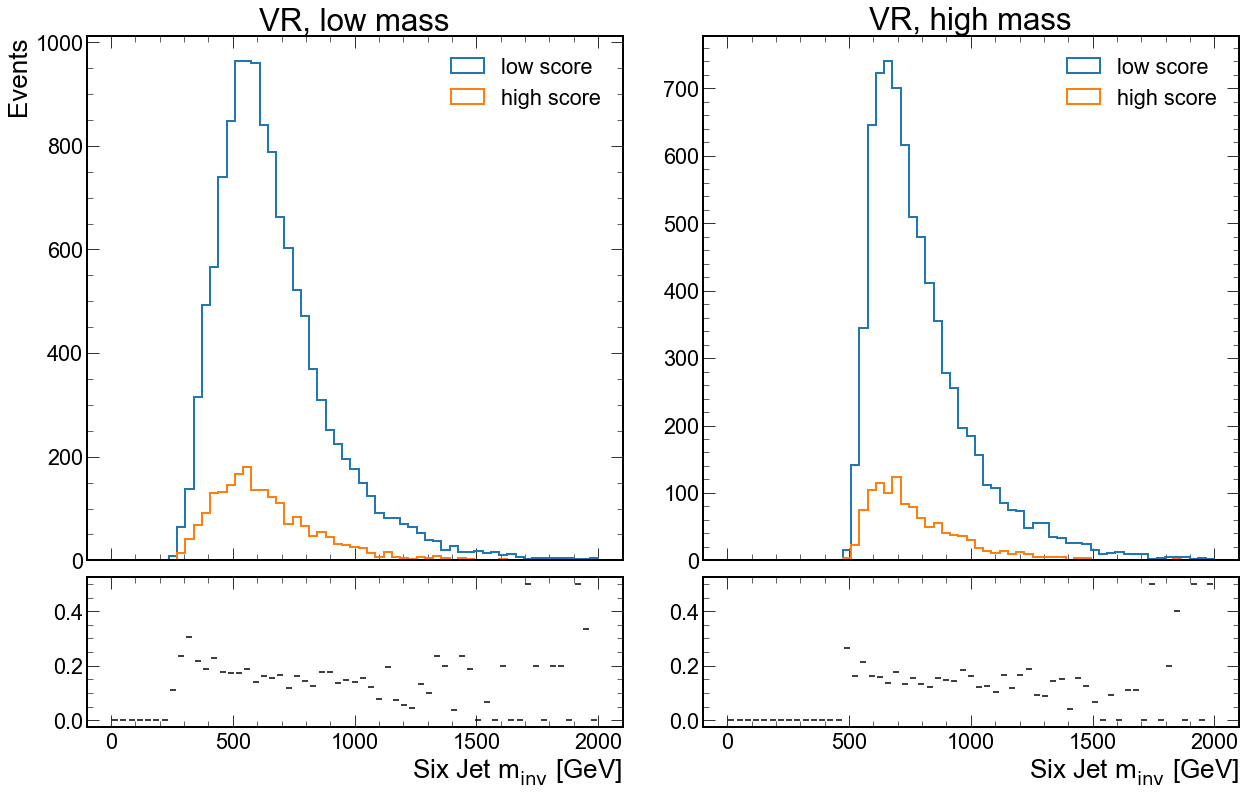

In [90]:
# start with a square Figure
fig = plt.figure(figsize=(20, 12))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(1, 1), height_ratios=(7, 2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.15, hspace=0.05)

ax = fig.add_subplot(gs[0,0])

ax.set_title('VR, low mass')

n_VRls, e = Hist(X.m[VRlslo], bins=mBins, ax=ax, label='low score')
n_VRhs, e = Hist(X.m[VRhslo], bins=mBins, ax=ax, label='high score')

ax.set_ylabel('Events')
ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,0], sharex=ax)

ratio = np.where(n_VRls != 0, n_VRhs/n_VRls, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

ax = fig.add_subplot(gs[0,1])

ax.set_title('VR, high mass')

n_VRls, e = Hist(X.m[VRlshi], bins=mBins, ax=ax, label='low score')
n_VRhs, e = Hist(X.m[VRhshi], bins=mBins, ax=ax, label='high score')

ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,1], sharex=ax)

ratio = np.where(n_VRls != 0, n_VRhs/n_VRls, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

plt.tight_layout()

fig.savefig("plots/Data/mass_bands/VR_hi_lo_hs_ls.pdf", bbox_inches='tight')

In [16]:
max_mass = 2000
min_mass = 250

In [17]:
dat_CRls_mask
dat_CRhs_mask
dat_VRls_mask
dat_VRhs_mask

<Array [False, False, False, ... False, False] type='434815 * bool'>

In [18]:
dat_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0].to_numpy()
dat_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1].to_numpy()
dat_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0].to_numpy()
dat_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1].to_numpy()
dat_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0].to_numpy()
dat_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1].to_numpy()
dat_H1_pt = datTree.t6_higgs_pt[:,0].to_numpy()
dat_H2_pt = datTree.t6_higgs_pt[:,1].to_numpy()
dat_H3_pt = datTree.t6_higgs_pt[:,2].to_numpy()
dat_H1_eta = datTree.t6_higgs_eta[:,0].to_numpy()
dat_H2_eta = datTree.t6_higgs_eta[:,1].to_numpy()
dat_H3_eta = datTree.t6_higgs_eta[:,2].to_numpy()
dat_H1_dr = datTree.t6_higgs_dr[:,0].to_numpy()
dat_H2_dr = datTree.t6_higgs_dr[:,1].to_numpy()
dat_H3_dr = datTree.t6_higgs_dr[:,2].to_numpy()

In [19]:
print(len(dat_H1_b1_pt[dat_CRls_mask]))
print(len(CRlslo))

61733
434815


In [20]:
data_crlslo = np.column_stack((dat_H1_b1_pt[CRlslo], dat_H1_b2_pt[CRlslo], dat_H2_b1_pt[CRlslo], dat_H2_b2_pt[CRlslo], dat_H3_b1_pt[CRlslo], dat_H3_b2_pt[CRlslo], dat_H1_pt[CRlslo], dat_H2_pt[CRlslo], dat_H3_pt[CRlslo], dat_H1_dr[CRlslo], dat_H2_dr[CRlslo], dat_H3_dr[CRlslo], dat_H1_eta[CRlslo], dat_H2_eta[CRlslo], dat_H3_eta[CRlslo]))
data_crhslo = np.column_stack((dat_H1_b1_pt[CRhslo], dat_H1_b2_pt[CRhslo], dat_H2_b1_pt[CRhslo], dat_H2_b2_pt[CRhslo], dat_H3_b1_pt[CRhslo], dat_H3_b2_pt[CRhslo], dat_H1_pt[CRhslo], dat_H2_pt[CRhslo], dat_H3_pt[CRhslo], dat_H1_dr[CRhslo], dat_H2_dr[CRhslo], dat_H3_dr[CRhslo], dat_H1_eta[CRhslo], dat_H2_eta[CRhslo], dat_H3_eta[CRhslo]))

In [21]:
data_crlshi = np.column_stack((dat_H1_b1_pt[CRlshi], dat_H1_b2_pt[CRlshi], dat_H2_b1_pt[CRlshi], dat_H2_b2_pt[CRlshi], dat_H3_b1_pt[CRlshi], dat_H3_b2_pt[CRlshi], dat_H1_pt[CRlshi], dat_H2_pt[CRlshi], dat_H3_pt[CRlshi], dat_H1_dr[CRlshi], dat_H2_dr[CRlshi], dat_H3_dr[CRlshi], dat_H1_eta[CRlshi], dat_H2_eta[CRlshi], dat_H3_eta[CRlshi]))
data_crhshi = np.column_stack((dat_H1_b1_pt[CRhshi], dat_H1_b2_pt[CRhshi], dat_H2_b1_pt[CRhshi], dat_H2_b2_pt[CRhshi], dat_H3_b1_pt[CRhshi], dat_H3_b2_pt[CRhshi], dat_H1_pt[CRhshi], dat_H2_pt[CRhshi], dat_H3_pt[CRhshi], dat_H1_dr[CRhshi], dat_H2_dr[CRhshi], dat_H3_dr[CRhshi], dat_H1_eta[CRhshi], dat_H2_eta[CRhshi], dat_H3_eta[CRhshi]))

In [22]:
data_vrlslo = np.column_stack((dat_H1_b1_pt[VRlslo], dat_H1_b2_pt[VRlslo], dat_H2_b1_pt[VRlslo], dat_H2_b2_pt[VRlslo], dat_H3_b1_pt[VRlslo], dat_H3_b2_pt[VRlslo], dat_H1_pt[VRlslo], dat_H2_pt[VRlslo], dat_H3_pt[VRlslo], dat_H1_dr[VRlslo], dat_H2_dr[VRlslo], dat_H3_dr[VRlslo], dat_H1_eta[VRlslo], dat_H2_eta[VRlslo], dat_H3_eta[VRlslo]))
data_vrhslo = np.column_stack((dat_H1_b1_pt[VRhslo], dat_H1_b2_pt[VRhslo], dat_H2_b1_pt[VRhslo], dat_H2_b2_pt[VRhslo], dat_H3_b1_pt[VRhslo], dat_H3_b2_pt[VRhslo], dat_H1_pt[VRhslo], dat_H2_pt[VRhslo], dat_H3_pt[VRhslo], dat_H1_dr[VRhslo], dat_H2_dr[VRhslo], dat_H3_dr[VRhslo], dat_H1_eta[VRhslo], dat_H2_eta[VRhslo], dat_H3_eta[VRhslo]))

In [23]:
data_vrlshi = np.column_stack((dat_H1_b1_pt[VRlshi], dat_H1_b2_pt[VRlshi], dat_H2_b1_pt[VRlshi], dat_H2_b2_pt[VRlshi], dat_H3_b1_pt[VRlshi], dat_H3_b2_pt[VRlshi], dat_H1_pt[VRlshi], dat_H2_pt[VRlshi], dat_H3_pt[VRlshi], dat_H1_dr[VRlshi], dat_H2_dr[VRlshi], dat_H3_dr[VRlshi], dat_H1_eta[VRlshi], dat_H2_eta[VRlshi], dat_H3_eta[VRlshi]))
data_vrhshi = np.column_stack((dat_H1_b1_pt[VRhshi], dat_H1_b2_pt[VRhshi], dat_H2_b1_pt[VRhshi], dat_H2_b2_pt[VRhshi], dat_H3_b1_pt[VRhshi], dat_H3_b2_pt[VRhshi], dat_H1_pt[VRhshi], dat_H2_pt[VRhshi], dat_H3_pt[VRhshi], dat_H1_dr[VRhshi], dat_H2_dr[VRhshi], dat_H3_dr[VRhshi], dat_H1_eta[VRhshi], dat_H2_eta[VRhshi], dat_H3_eta[VRhshi]))

In [24]:
cols = ['H1 b1 pt','H1 b2 pt','H2 b1 pt','H2 b2 pt','H3 b1 pt','H3 b1 pt','H1 pt','H2 pt','H3 pt','H1 dr','H2 dr','H3 dr','H1 eta','H2 eta','H3 eta']

In [25]:
from hep_ml import reweight
from pandas import DataFrame

In [26]:
df_crlslo = DataFrame(data=data_crlslo, columns=cols)
df_crhslo = DataFrame(data=data_crhslo, columns=cols)
df_crlshi = DataFrame(data=data_crlshi, columns=cols)
df_crhshi = DataFrame(data=data_crhshi, columns=cols)

In [27]:
df_vrlslo = DataFrame(data=data_vrlslo, columns=cols)
df_vrhslo = DataFrame(data=data_vrhslo, columns=cols)
df_vrlshi = DataFrame(data=data_vrlshi, columns=cols)
df_vrhshi = DataFrame(data=data_vrhshi, columns=cols)

In [28]:
# A set of BDT arguments borrowed from 4b analysis
# Nestimators, learningRate, maxDepth, minLeaves, GB['subsample'], randomState, nFolds
args = [40, 0.1, 3, 300, 0.6, 2020]

In [30]:
ls_weights_lo = np.ones(len(df_crlslo))*TF_lo
hs_weights_lo = np.ones(len(df_crhslo))

np.random.seed(args[5]) #Fix any random seed using numpy arrays
reweighter_base_lo = reweight.GBReweighter(n_estimators=args[0], learning_rate=args[1], max_depth=args[2], min_samples_leaf=args[3],gb_args={'subsample': args[4]})
reweighter_lo = reweight.FoldingReweighter(reweighter_base_lo, random_state=args[5], n_folds=2, verbose=False)
reweighter_lo.fit(df_crlslo,df_crhslo,ls_weights_lo,hs_weights_lo)

FoldingReweighter(base_reweighter=GBReweighter(gb_args={'subsample': 0.6},
                                               learning_rate=0.1,
                                               min_samples_leaf=300),
                  random_state=2020, verbose=False)

In [31]:
ls_weights_hi = np.ones(len(df_crlshi))*TF_hi
hs_weights_hi = np.ones(len(df_crhshi))

np.random.seed(args[5]) #Fix any random seed using numpy arrays
reweighter_base_hi = reweight.GBReweighter(n_estimators=args[0], learning_rate=args[1], max_depth=args[2], min_samples_leaf=args[3],gb_args={'subsample': args[4]})
reweighter_hi = reweight.FoldingReweighter(reweighter_base_hi, random_state=args[5], n_folds=2, verbose=False)
reweighter_hi.fit(df_crlshi,df_crhshi,ls_weights_hi,hs_weights_hi)

FoldingReweighter(base_reweighter=GBReweighter(gb_args={'subsample': 0.6},
                                               learning_rate=0.1,
                                               min_samples_leaf=300),
                  random_state=2020, verbose=False)

In [78]:
ls_weights_lo = np.ones(len(df_crlslo))*TF_lo
ws_lo = reweighter_lo.predict_weights(df_crlslo,ls_weights_lo,lambda x: np.mean(x, axis=0))

In [79]:
ls_weights_hi = np.ones(len(df_crlshi))*TF_hi
ws_hi = reweighter_hi.predict_weights(df_crlshi,ls_weights_hi,lambda x: np.mean(x, axis=0))

In [38]:
X_cr_ls_lo = ak.nan_to_num(X.m[CRlslo],0).to_numpy()
X_cr_ls_hi = ak.nan_to_num(X.m[CRlshi],0).to_numpy()
X_cr_hs_lo = ak.nan_to_num(X.m[CRhslo],0).to_numpy()
X_cr_hs_hi = ak.nan_to_num(X.m[CRhshi],0).to_numpy()

X_vr_ls_lo = ak.nan_to_num(X.m[VRlslo],0).to_numpy()
X_vr_ls_hi = ak.nan_to_num(X.m[VRlshi],0).to_numpy()
X_vr_hs_lo = ak.nan_to_num(X.m[VRhslo],0).to_numpy()
X_vr_hs_hi = ak.nan_to_num(X.m[VRhshi],0).to_numpy()

/tmp/ipykernel_11742/150728501.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


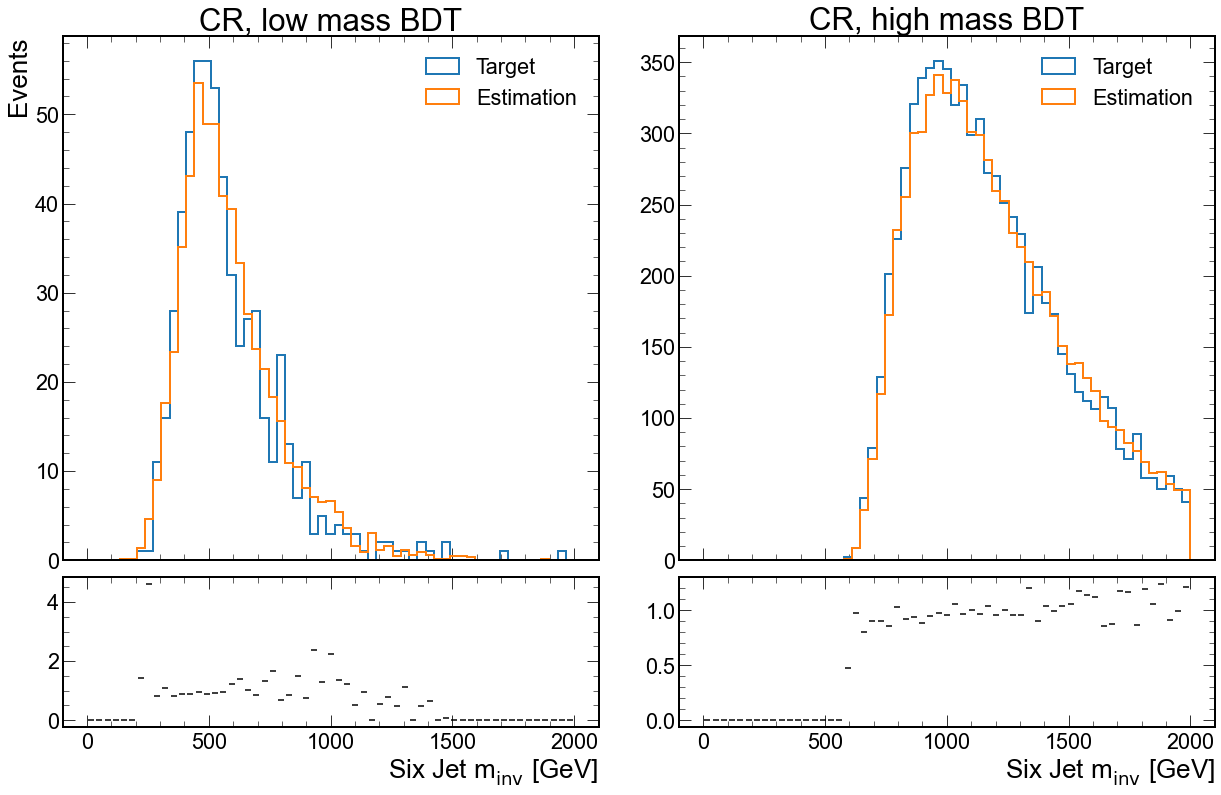

In [81]:
# start with a square Figure
fig = plt.figure(figsize=(20, 12))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(1, 1), height_ratios=(7, 2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.15, hspace=0.05)

ax = fig.add_subplot(gs[0,0])

ax.set_title('CR, low mass BDT')

n_CRhs, e = Hist(X_cr_hs_lo, bins=mBins, ax=ax, label='Target')
n_CRls_transformed, e = Hist(X_cr_ls_lo, weights=ls_weights_lo, bins=mBins, ax=ax, label='Estimation')

ax.set_ylabel('Events')
ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,0], sharex=ax)

ratio = np.where(n_CRhs != 0, n_CRls_transformed/n_CRhs, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

ax = fig.add_subplot(gs[0,1])

ax.set_title('CR, high mass BDT')

n_CRhs, e = Hist(X_cr_hs_hi, bins=mBins, ax=ax, label='Target')
n_CRls_transformed, e = Hist(X_cr_ls_hi, weights=ls_weights_hi, bins=mBins, ax=ax, label='Estimation')

ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,1], sharex=ax)

ratio = np.where(n_CRhs != 0, n_CRls_transformed/n_CRhs, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

plt.tight_layout()

In [82]:
ls_weights_lo = np.ones(len(df_vrlslo))*TF_lo
ws_lo = reweighter_lo.predict_weights(df_vrlslo,ls_weights_lo,lambda x: np.mean(x, axis=0))

In [83]:
ls_weights_hi = np.ones(len(df_vrlshi))*TF_hi
ws_hi = reweighter_hi.predict_weights(df_vrlshi,ls_weights_hi,lambda x: np.mean(x, axis=0))

/tmp/ipykernel_11742/3661897358.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


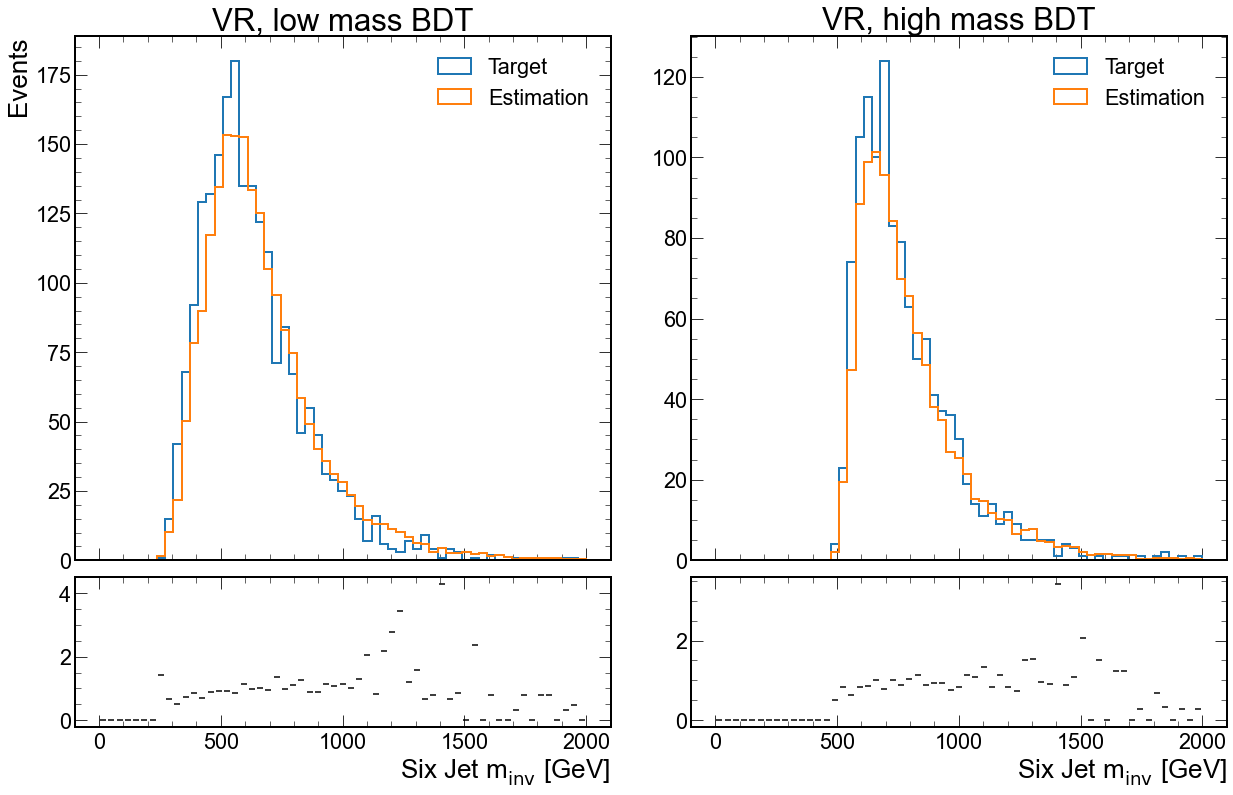

In [91]:
# start with a square Figure
fig = plt.figure(figsize=(20, 12))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(1, 1), height_ratios=(7, 2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.15, hspace=0.05)

ax = fig.add_subplot(gs[0,0])

ax.set_title('VR, low mass BDT')

n_VRhs, e = Hist(X_vr_hs_lo, bins=mBins, ax=ax, label='Target')
n_VRls_transformed, e = Hist(X_vr_ls_lo, weights=ls_weights_lo, bins=mBins, ax=ax, label='Estimation')

ax.set_ylabel('Events')
ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,0], sharex=ax)

ratio = np.where(n_VRhs != 0, n_VRls_transformed/n_VRhs, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

ax = fig.add_subplot(gs[0,1])

ax.set_title('VR, high mass BDT')

n_VRhs, e = Hist(X_vr_hs_hi, bins=mBins, ax=ax, label='Target')
n_VRls_transformed, e = Hist(X_vr_ls_hi, weights=ls_weights_hi, bins=mBins, ax=ax, label='Estimation')

ax.tick_params(axis="x", labelbottom=False)

ax = fig.add_subplot(gs[1,1], sharex=ax)

ratio = np.where(n_VRhs != 0, n_VRls_transformed/n_VRhs, 0)
ax.scatter(x=x_bins(e), y=ratio, marker='_', color='k')
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')

plt.tight_layout()

fig.savefig("plots/Data/mass_bands/VR_hi_lo_BDT.pdf", bbox_inches='tight')